# Latex Headers

 - Ensure proper support for certain latex notation
 - Code below

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\adagger}[0]{\hat{a}^{\dagger}}$$
$$\newcommand{\ahat}[0]{\hat{a}}$$
$$\newcommand{\bdagger}[0]{\hat{b}^{\dagger}}$$
$$\newcommand{\bhat}[0]{\hat{b}}$$
$$\newcommand{\cdagger}[0]{\hat{c}^{\dagger}}$$
$$\newcommand{\chat}[0]{\hat{c}}$$
$$\newcommand{\ddagger}[0]{\hat{d}^{\dagger}}$$
$$\newcommand{\dhat}[0]{\hat{d}}$$
$$\newcommand{\edagger}[0]{\hat{e}^{\dagger}}$$
$$\newcommand{\ehat}[0]{\hat{e}}$$
$$\newcommand{\fdagger}[0]{\hat{f}^{\dagger}}$$
$$\newcommand{\fhat}[0]{\hat{f}}$$
$$\newcommand{\gtwo}[0]{g^{(2)}}$$

# TEXT - Introduction to single photons with the quED (Week 1)
In this text, we're going to go over some of the basics of working with single photons, especially how they relate to the quED experimental setup. We'll start with a single photon source, which you'll be using in the lab. Then we'll talk about how to detect single photons.

Next, we're going to treat photons as indicidual particles, and we'll show how to verify that a source is indeed producing single photons. You'll reproduce that experiment in the lab.

Finally, as time allows, we'll look at single-photon interference.

1. [Source: Spontaneous Parametric Down-Conversion](#spdc)
1. [Detection: Avalanche Photodiode](#apd)
1. [Hanbury Brown-Twiss & Second order coherence $g^{(2)}$](#hbt)
    1. classical
    1. quantum

## Single photon source: Spontaneous Parametric Down-Conversion (SPDC) <a id='spdc'></a>

First, let's take a high level overview of how spontaneous parametric down conversion (SPDC) works. SPDC occurs when a pump photon is converted into 2 photons of less energy. Traditionally, one output photon is called the signal and the other is called the idler.


###  Phase Matching Conditions
One important feature of SPDC is the fact that it always obeys energy conservation: the energy of a pump photon before SPDC occurs is equal to the sum of the signal and idler photons after SPDC occurs.

:::{figure-md} EnergyConservation
<img src="FIGURES/quED/spdc_energyconsevation.png" width="200">

Image from HC Photonics.
:::


Another important feature is that the momentum after SPDC must be the same as the momentum before SPDC to satisfy conservation of momentum.


:::{figure-md} MomentumConservation
<img src="FIGURES/quED/spdc_momentum.png" width="300">

Image from Couteau's review paper.
:::


Recall that momentum is a vector, so the magnitude **and** direction need to be maintained. This is why we see that the signal and idler photons in the quED are non-colinear (they travel in different directions): their sum still matches the pump photons.

Matching the momentum is an a challening part of generating SPDC. As you recall, $\overrightarrow{k} = \frac{2\pi n}{\lambda}$ where $n$, the index of refraction, is a function of $\lambda$, the wavelength of the light. Choosing a material that has the appropriate index at the relevant wavelengths is challenging and involves looking at the dispersion relation, shown in figure {numref}`IndexMatching`.



:::{figure-md} IndexMatching
<img src="FIGURES/quED/spdc_index.png" width="300">

Image from HC Photonics
:::

Additionally,matching the indices requires using different polarization for the photons, leading to different types of SPDC. Note that the image below shows *classical* nonlinear optical processes, so you'll see that in some cases there is an input in the idler mode. 
:::{figure-md} SPDCTypes
<img src="FIGURES/quED/spdc_types.png" width="300">

Image from HC Photonics
:::

Knowing the types of SPDC is important when designing an SPDC source, but it's also important when *using* the SPDC source. The quED source is from Type 1 SPDC, as show in figure {numref} `quEDSPDCcone`, an image from the quTools manual for the quED. Look at how the output from the crystal is a series of cones concentric around the pump laser. When collecting the light from the SPDC output, it's important to make sure that the collection is of matching pairs from the same cone. Practically, the way to achieve that is by maximizing the the coincidence counts and not just the singles.

:::{figure-md} quEDSPDCcone
<img src="FIGURES/quED/manual_SPDC.jpg" width="300">

Image from quED Manual
:::

## Mathematical Description

In terms of the quantum optics, it's valuable to look at how SPDC can be described mathematically. First, let's consider the initial state of the system before SPDC occurs. We have a very powerful pump beam, which we express as a coherent state with eigenvalue $\alpha_p$. The signal and idler states are both vacuums, which are number states with 0 photons in them. So the initial state is given by

$$|\psi\rangle = |0_s,0_i,\alpha_p\rangle$$

We obtain the interaction Hamiltonian $\hat{H}_{si}$ from the expection of the pump laser field $$| \alpha_p\rangle = \hat{D}(\alpha_p) |0\rangle $$ where the displacement operator $$\hat{D}(\alpha_p)$$ creates the coherent state in mode p. Let's assume  $$\alpha_p \in \mathbb{R} $$ to avoid some math tedium. Then, in the interaction picture,

$$
\begin{aligned}
\hat{H}_{si} &= \langle \alpha_p | \hat{H}_{sip} | \alpha_p \rangle \\
&= -i \chi_2 (\hat{s} \hat{i} \alpha_p^* - \hat{s}^{\dagger} \hat{i}^{\dagger} \alpha_p) \\
&= -i \chi_2 \alpha_p (\hat{s}\hat{i} - \hat{s}^{\dagger} \hat{i}^{\dagger}) \\
&= -i \hbar \frac{\chi}{2} (\hat{s}\hat{i} - \hat{s}^{\dagger} \hat{i}^{\dagger})
\end{aligned}
$$

where we define

$$
\chi \equiv \frac{2 \chi_2 |\alpha_p|}{\hbar}.
$$

$\chi_{2}$ is the nonlinearity factor of the crystal and is given in (picometers)(Volts)$^{-1}$. This tiny value is why SPDC is such an inefficient process. Even though our pump power is very high ($\alpha_p >>0$), we still have only $~10^6$ photon pairs/second generation rate. 

Here, we explicitly factored out the $\hbar$ term to simplify the subsequent math since that $\hbar$ will be canceled by the $\hbar$ in the denominator of the time dependent Schrodinger equation, $\frac{\partial}{\partial t} |\psi(t)\rangle = -\frac{i}{\hbar} H |\psi(t)\rangle$.

### Classical Nonlinear optics

Briefly, SPDC is a fundamentally quantum process: it can't be described by classical nonlinear optics. In classical nonlinear optics, parametric ampification is the process where you combine a source with frequency $\omega_p$ and another source frequency with $\omega_i$ in a nonlinear crystal to generate a field at $\omega_s = \omega_p - \omega_i$ and amplify the field at $\omega_i$. This is similar to SPDC in that you're generating light at a wavelength longer than the pump, but it's disimilar in that it *requires* a non-zero input at $\omega_i$. This is what makes SPDC spontaneous: the output at the signal and idler aren't stimulated by any input because the input is in the vacuum state.

### Further reading

For a good overview of SPDC with additional details, this [Review Article](https://doi.org/10.1080/00107514.2018.1488463 'DOI') is recommended. Additionally, for more information about designing a system to produce SPDC, the [HC Photonics PPLN GUIDE: Overview](https://www.hcphotonics.com/ppln-guide-overview) is very informative. For nonlinear optics, Robert W. Boyd's *Nonlinear Optics* is an excellent textbook.

### Detection <a id='apd'></a>

The detectors in this class will mostly be treated as a black box: you put in some photons, you get out a count of the photons. However, if you've never worked with photodetectors, it can be helpful to look briefly at how detectors work.

Briefly, a photodetector uses a photodiode to generate a photocurrent, which can be amplified or measured directly. The high level understanding is that you shine a light on a device, and the light is absorbed and creates a current. Figure {numref} `Detector` below shows a basic cartoon of the process. A photodiode is a semiconductor device based on a crystal structure. In this type of crystal structure, one region has mobile electrons while another has mobile positive charges, called holes. When an incident photon (energy $h\nu$) has enough energy to overcome the bandgap energy $E_g$, it can excite an electron and a hole enough that an applied voltage will move the charge carriers. This movement of charge generates a photocurrent.

:::{figure-md} Detector
<img src="FIGURES/quED/detector.jpg" width="600">

Image from Saleh and Teich.
:::

Our particular device are avalanche photodetectors (APD). What makes them special is that they're designed so that once an incident photon excites an electron and hole, that electron and hole excite an additional electron and hole, which excites an additional electron an hole. This creates an "avalanche" effect and makes it possible to measure single photons.

## Second order coherence - $\gtwo$(0)<a id='hbt'></a>

Now that you know more about the source and detectors we have available, let's look at our first experiment to measure the second order coherence, $\gtwo$. $\gtwo$ is an important parameter when describing a light source, giving us information about how close the actual source is to an ideal.

Let's first review the mechanics of a beamsplitter, an essential component in this measurement.

### Recall a beamsplitter

Consider a lossless 50/50 beamsplitter with indpendent inputs $\ahat$ and $\bhat$. The outputs $\chat$ and $\dhat$ are defined as

$$\chat = \frac{1}{\sqrt{2}}\ahat + \frac{1}{\sqrt{2}}\bhat$$
$$\dhat = \frac{1}{\sqrt{2}}\ahat - \frac{1}{\sqrt{2}}\bhat$$

:::{figure-md} Beamsplitter
<img src="FIGURES/quED/beamsplitter.png" width="600">

A beamsplitter.
:::

The operators of each field $\ahat$ and $\bhat$ satisfy the boson commutation relations

$$[\ahat,\adagger] = \ahat\adagger - \adagger\ahat = [\bhat,\bdagger] = 1$$
 
 and that $\ahat$ and $\bhat$ are independent fields, ie
 
 $$[\ahat,\bdagger] = [\bhat,\adagger] = 0$$
 
You can verify that the outputs follow the same pattern and that the commutation relations are maintained.
 
 $$[\chat,\cdagger] = [\dhat,\ddagger] = 1$$
 
 and
 
  $$[\chat,\ddagger] = [\dhat,\cdagger] = 0$$

### Hanbury Brown-Twiss (HBT) Experiment

The Hanbury Brown-Twiss (HBT) experiment was first conducted by astronomers, but it's now used in quantum optics. The schematic is show below. There's a 50-50 beamsplitter, and only one input port, $\ahat$ has light shining in. The other input port, $\bhat$ is in a vacuum state. The measurement is taken by putting detectors at the output ports $\chat$ and $\dhat$ and measuring the singles and coincidences.

:::{figure-md} HBTSchematic
<img src="FIGURES/quED/HBT_cartoon.png" width="600">

Schematic of the HBT setup.
:::

First, let's look at the experiment in one particular case, when the input light is in the single photon number state.

### Coincidence with a single photon
Specifically, we want to know how often we get a photon at both $\chat$ and $\dhat$ simultaneously. We call this a *coincidence* meaning an event where 2 (or more) detection events occur within a short period of time (on the scale of  a few nanoseconds) on 2 separate detectors. Looking at coincidences is an important measurement in quantum optics.

What is the coincidence of $\chat$ and $\dhat$?

$$
\begin{aligned}
\langle n_c n_d\rangle &= {}_b\langle0|{}_a\langle1|\hat{n}_c\hat{n}_d|1\rangle_a|0\rangle_b \\
&= {}_b\langle0|{}_a\langle1|\frac{1}{\sqrt{2}}(\adagger + \bdagger)\frac{1}{\sqrt{2}}(\ahat + \bhat)\frac{1}{\sqrt{2}}(\adagger - \bdagger)\frac{1}{\sqrt{2}}(\ahat - \bhat)|1\rangle_a|0\rangle_b \\
&= \frac{1}{4}{}_b\langle0|{}_a\langle1|(\adagger\ahat + \adagger\bhat + \bdagger\ahat + \bdagger\bhat)(\adagger\ahat - \adagger\bhat - \bdagger\ahat + \bdagger\bhat)|1\rangle_a|0\rangle_b \\
&= \frac{1}{4}{}_b\langle0|{}_a\langle1|(\adagger\ahat\adagger\ahat - \adagger\bhat\bdagger\ahat|1\rangle_a|0\rangle_b \\ 
&= \frac{1}{4}{}_b\langle0|{}_a\langle1|(\hat{n}_a^2 - \hat{n}_a(1 + \hat{n}_b)|1\rangle_a|0\rangle_b \\
&= \frac{1}{4}{}_a\langle1|\hat{n}_a(\hat{n}_a - 1)|1\rangle_a \\
&= 0 
\end{aligned}$$

So we see in the case with a single photon input into a beamsplitter we expect 0 coincidences. Conceptually this makes sense: a single photon can only go through one of 2 paths in the beamsplitter. If we look at both outputs of the beamsplitter at the same time, we should only see a click on one of the outputs.

The video below works through this math step by step, in case you'd like to see how the operator math can be evaluated.

<iframe src="https://drive.google.com/file/d/1mwGIT02T_--aJ-tp_Cb0yPVsnxI6hhyQ/preview" width="640" height="480" allow="autoplay"></iframe>

### Second order time coherence

The above exercise is a necessary step for finding the *second-order coherence*. The most general case assumes the detectors record events at slightly different times, ie the detection time at detector c is $t_c$ while the detection at detector d is $t_d$. This allows us to account for situations where the detectors are slightly different distances away from the beamsplitter.

$$\gtwo(t_c,t_d) = \frac{\langle\hat{n}_c(t_c)\hat{n}_d(t_d)\rangle}{\langle\hat{n}_c(t_c)\rangle\langle\hat{n}_d(t_d)\rangle}$$

If, as above, $\bhat$ is in a vacuum state, for and $t_c = t_d$, we can simplify to

$$\gtwo(0) = \frac{\langle\hat{n}_a(\hat{n}_a -1)\rangle}{\langle\hat{n}_a\rangle^2}$$

Clearly, for the case of $\ahat$ being in the $|1\rangle$ state, we find $g^{(2)}(0) = 0 $.


### Heralded single-photon source

The set-up we'll see in the lab, however, isn't a case with single photons. SPDC is a *heralded* single photon source. That means that if an idler photon is generated, it's extremely likely we'll measure a corresponding signal photon. Due to issues like multiple pair emissions in the crystal and detector-related issues like dark counts and stray light, it's not a 100% correlation, but the probability is still very high.

The result is that the $\gtwo$ we're interested in is conditioned on detecting an idler photon in the other arm, as in the image below. That is to say that we only want to look for coincidences between the two signal detectors when there is also a detection event in the idler detector.

:::{figure-md} Heralded HBT
<img src="FIGURES/quED/HBT_heralded.png" width="400">

Image from quTools.
:::

The $\gtwo$ measurement is now conditioned on the idler detection at time $t_i$, which we is expressed the following

$$\gtwo(t_c,t_d|t_i) = \frac{\langle\hat{n}_c(t_c)\hat{n}_d(t_d)\rangle_{pm}}{\langle\hat{n}_c(t_c)\rangle_{pm}\langle\hat{n}_d(t_d)\rangle_{pm}}$$

where the "pm" subscript tells us to wait post-measurement to select which detections to use. The formal math is worked out in [Bocquillon et al, PRA 79 035801 (2009)](http://dx.doi.org/10.1103/PhysRevA.79.035801) and [Razavi et al, JPhysB 42 114013 (2009)](http://stacks.iop.org/JPhysB/42/114013), but we're going to approach this conceptually.

First, let's look at the numerator term, $N = \langle\hat{n}_c(t_c)\hat{n}_d(t_d)\rangle_{pm}$. Effectively, we're saying that we're looking at coincidences at c and d only in the case we make a measurement at i. So, that means we're looking for three-fold coincidences $\langle\hat{n}_c\hat{n}_d\hat{n}_i\rangle$. 

We want to normalize this to what we would expect if we were measuring uncorrelated light. For detector $j$ where $j = c, d, i$, we say that the measured singles, $N_j$, over a measurement time $T$ is equal to the probability of getting a count, $p_j$, multiplied by the number of coincidence bins, $\frac{T}{\Delta_w}$ where $\Delta_w$ is the coincidence bin width. That is

$$N_j = p_j \cdot \frac{T}{\Delta_w}$$

Now, for uncorrelated light sources, we expect the probability of three-fold coincidences over time $T$ to be equal to the product of the probabilities

$$p^a_{icd} = p_i \cdot p_c \cdot p_d = N_c \cdot \frac{\Delta_w}{T} \cdot N_d \cdot \frac{\Delta_w}{T} \cdot N_i \cdot \frac{\Delta_w}{T} = N_c N_d N_i (\frac{\Delta_w}{T})^3$$

However, our setup makes it easier for us to measure two-fold coincidences. So, let's consider the probability of a three fold coincidence in the following way:

$$p^a_{icd} = p^a_{ic} \cdot p_d = p^a_{ic} \cdot \frac{p_i}{p_i} \cdot p_d = \frac{p^a_{ic}p^a_{id}}{p_i}$$ 

Similarly as above, we're assuming that the expected number of coincidences $N_{12}$ over time $T$ with coincidence window $\Delta_w$ is given by $N_{12} = p_{12} \cdot \frac{T}{\Delta_w}$, which means that

$$ p^a_{icd} = \frac{N_{ic} \frac{\Delta_w}{T} N_{id} \frac{\Delta_w}{T}}{N_i\frac{\Delta_w}{T}}  = \frac{N_{ic}N_{id}}{N_i}\frac{\Delta_w}{T}$$ 

Now we have an expression for $p^a_{icd}$ which gives us the probability of getting a three-fold coincidence during coincidence window $\Delta_w$. This expression is in the form of $\Delta_w$, total measurement time $T$, and the number of two-fold coincidences $N_{ic}$ and $N_{id}$ as well as the total number of idler counts in that time, $N_i$. Now, to get from the probability to the expected valued, we multiply by the total number of coincidence bins over our measurement time, $\frac{T}{\Delta_w}$, which gives us the following:

$$N^a_{icd} = \frac{N_{ic}N_{id}}{N_i}\frac{\Delta_w}{T} \cdot \frac{T}{\Delta_w} = \frac{N_{ic}N_{id}}{N_i}$$

Now, going back to $\gtwo$, we now take the ratio of our measured $N_{icd}$ compared to what we expect for independet light sources, and we get

$$\gtwo(0) = \frac{N_{icd}N_i}{N_{ic}N_{id}}$$


The video below is a lecture that nicely walks through how you look at the $\gtwo(0)$ measurement of a heralded source. The relevant part is about 20 minutes long, and it's based on straighforward probability and developing physical intuition about the HBT experiment.

<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/4zsd31E2n4w?start=635" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

##  Simulation by QuTip
We can model the SPDC process and squeezed light via the formalism of the degenerate parametric amplifier. The code below is meant to enrich your understanding of the SPDC process.

In [2]:
!pip install qutip

from qutip import *

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from numpy import *
# install QuTip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Operators and Hamiltonian

In the following code, we set the parameters chi, N1, and N2, which are used to define the system's operators a, na, b, and nb. These operators represent the annihilation and number operators for two distinct modes of the system.

The tensor() function is used to create composite operators that act on the joint Hilbert space of the two modes. The destroy() and num() functions create the annihilation and number operators, respectively.

Recall from above that the interaction Hamiltonian is

$$
\begin{aligned}
H_{ab} = -i \hbar \frac{\chi}{2} (a b - a^{\dagger} b^{\dagger})
\end{aligned}
$$

where we define

$$
\chi \equiv \frac{2 \chi_2 |\alpha_p|}{\hbar}.
$$

Here, we explicitly factored out the $\hbar$ term to simplify the subsequent math since that $\hbar$ will be canceled by the $\hbar$ in the denominator of the time dependent Schrodinger equation, $\frac{\partial}{\partial t} |\psi(t)\rangle = -\frac{i}{\hbar} H |\psi(t)\rangle$.

By default, the unit of time in Qutip is set to dimensionless, so $\hbar$ is used to convert between dimensionless time and physical time.
 


In [ ]:
#Constants
hbar=6.67e-34/(2*pi) #Planck's reduced constant
eps0=8.85e-12 # permittivity of free space
c=3e8 # speed of light

#Parameters
phase_matching_bandwidth=1e13 # approximate in Hz
n_refr = 2.2 # refractive index of the crystal
beam_power=1e-2 # in Watts
beam_area=1e-5**2 # in m^2
pump_intensity=beam_power/beam_area
alpha_p = pow(2*pump_intensity/(c*eps0*n_refr),1/2)

#presentation parameters
plot_fontsize=12

#print(alpha_p)
chi2=2.7e-12 # (2.7 pm/V according to https://www.unitedcrystals.com/BBOProp.html) 
#chi = 0.2
chi = 2*chi2*alpha_p/hbar
print(chi*hbar)
N1 = 10
N2 = 10


# definitions of operators 
a  = tensor(destroy(N1), qeye(N2))
na = tensor(num(N1),     qeye(N2)) 
b  = tensor(qeye(N1),    destroy(N2))
nb = tensor(qeye(N1),    num(N2)) 

#We obtain the following interaction Hamiltonian on the three fields $$a,b,p$$ after tracing out the pump field 
# the fully quantum 3-wave mixing Hamiltonion would be H_abp = chi2 * (a * b * p.dag() + a.dag() * b.dag() * p)

H0 = 0*a # interaction Hamiltonian before the 3-wave mixing (used for calculating initial state)
Hab = - 1j* hbar *chi * (a * b - a.dag() * b.dag())/2



9.992292869760638e-07


### Initial state and state evolution

In the following, we'll will: 
* initialize the input state psi0 of modes a and b, which are both in the vacuum state 
* tlist: tlist is a list of times that specifies the times at which the system should be evaluated during the evolution. In the example, tlist is created using the numpy function linspace, which generates an array of evenly spaced values over a specified interval. 

* c_ops is a list of collapse operators that describe the sources of decoherence and dissipation in the system. Collapse operators represent the interactions of the system with its environment that cause transitions between the energy eigenstates of the system.
* e_ops is a python list storing observables. Here, the e_ops list is empty, which means that there are no observables being monitored during the evolution of the system.

* We use the function mesolve from the Qutip library to solve the [quantum master equation ](https://https://en.wikipedia.org/wiki/Quantum_master_equation) to find the time evolution of the system. The function takes as input the Hamiltonian Hab, the initial state psi0, the list of times tlist, the list of collapse operators c_ops, and the list of observables e_ops. The function returns an object output that contains information about the time evolution of the system, such as the states of the system at each time in tlist.



In the example, the c_ops list is empty, which means that there are no sources of decoherence or dissipation in the system. As a result, the evolution of the system is purely unitary and described by the Hamiltonian $H_{ab}$. 

The following code uses a python dictionary data structure to conveniently store operators and expected values. In anticipation of correlation values to be considered below, we're including those in our dictionary as well.  

In [ ]:
# start in the ground (vacuum) state
psi0 = tensor(basis(N1,0), basis(N2,0)) # initial state in the vacuum
# REVISION: to allow for some background light contamination (room lights, fluorescence, etc), let's actually start in a thermal state with mean photon number..
# REVISION2: with thermal state, the code has to do density matrix evolution which is super slow. let's approximate by equally bright coherent state (which is an equally good approximation as there may be some laser background etc)
#rho0= tensor(thermal_dm(N1, background_photons),thermal_dm(N2, background_photons))
#psi0= tensor(displace(N1,sqrt(background_photons)),displace(N2,sqrt(background_photons)))*psi0
#psi0= tensor(displace(N1,sqrt(background_photons)),displace(N2,sqrt(background_photons)))*psi0
theta=0
background_photons=1e-20
#c_ops = [] # c_ops is a list of collapse operators that describe the sources of decoherence and dissipation in the system. Collapse operators represent the interactions of the system with its environment that cause transitions between the energy eigenstates of the system.
n_th = background_photons  # bath temperature in terms of excitation number
c_ops = []# [sqrt((1+n_th)) * a, sqrt(n_th) * a.dag()]

psi0=cos(theta)**2*psi0 +sin(theta)**2 * tensor(displace(N1,sqrt(background_photons)),qeye(N2))*psi0
#rho0 = steadystate(H0, c_ops)



tlist = np.linspace(0, 1000, 1000) # tlist is a list of times that specifies the times at which the system should be evaluated during the evolution. In the example, tlist is created using the numpy function linspace, which generates an array of evenly spaced values over a specified interval.

e_ops = [] # e_ops is a python list storing observables. Here, the e_ops list is empty, which means that there are no observables being monitored during the evolution of the system
psi_out = mesolve(Hab, psi0, tlist, c_ops, e_ops)

ops_dict = {
  "na": a.dag() * a,
  "na_squared": (a.dag() * a)**2,
  "nb": b.dag() * b,
  "nb_squared": (b.dag() * b)**2,
}

expected_vals_dict = {key: np.zeros(len(psi_out.states)) for key in ops_dict.keys()}

for idx, psi in enumerate(psi_out.states):
  for key in ops_dict.keys():
    expected_vals_dict[key][idx] = expect(ops_dict[key], psi)
    

Let's study $|\psi_{out} \rangle$ by plotting four subplots that show the average number of photons in each mode a and b, as well as their fluctuations, as a function of time. The subplots are labeled with the corresponding quantities and the x-axis of all subplots is shared.

max_photon_flux_a=phase_matching_bandwidth * max(<ada>)= 2.5e+06 photons/sec


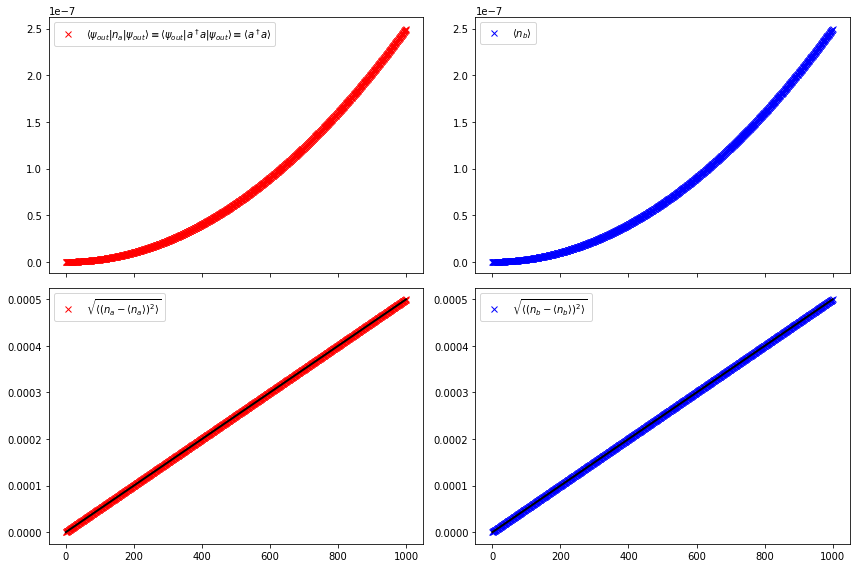

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(12,8))

tlistp=tlist[1:]
lines = [
    [axes[0,0].plot(tlist, expected_vals_dict["na"], 'rx', linewidth=2), r'$\langle \psi_{out}| n_a| \psi_{out} \rangle \equiv \langle \psi_{out}| a^\dagger a | \psi_{out} \rangle \equiv \langle a^\dagger a \rangle$'],
    [axes[0,1].plot(tlist, expected_vals_dict["nb"], 'bx', linewidth=2), r'$\langle n_b \rangle$'],
    [axes[1,0].plot(tlist, np.sqrt(expected_vals_dict["na_squared"] - expected_vals_dict["na"]**2), 'rx', linewidth=2), r'$\sqrt{\langle( n_a - \langle n_a \rangle )^{2} \rangle }$'],
    [axes[1,1].plot(tlist, np.sqrt(expected_vals_dict["nb_squared"] - expected_vals_dict["nb"]**2), 'bx', linewidth=2), r'$\sqrt{\langle( n_b -\langle n_b \rangle)^{2}\rangle }$'],
    [axes[1,0].plot(tlist, np.sqrt(expected_vals_dict["na"]**2+expected_vals_dict["na"]), 'k-', linewidth=2), r'$\sqrt{\langle n_a \rangle + \langle n_a \rangle^{2} }$'],
    [axes[1,1].plot(tlist, np.sqrt(expected_vals_dict["nb_squared"]), 'k-', linewidth=2), r'$\sqrt{\langle n_b \rangle + \langle n_b \rangle^{2} }$']
]

for idx, line in enumerate(lines[:4]):
    line[0][0].set_label(line[1])
    axes[idx//2, idx%2].legend()
    
print("max_photon_flux_a=phase_matching_bandwidth * max(<ada>)= {:.1e} photons/sec".format(phase_matching_bandwidth * max(expected_vals_dict["na"])))

fig.tight_layout()


### State evolution

Next, we will plot the photon distributions of two quantum optical modes a and b at selected times. The time indices are spaced over Ntsamples time steps and are stored in the t_idx_vec list. 

The following subplots show the state evolution (note the plots have shared horizontal and vertical axes). We represent the photon distributions as bar plots on the subplots. 

In [ ]:
import ipywidgets as widgets
from IPython.display import display

xmin,xmax = 0,5

def update_plot(t):
    fig, axes = plt.subplots(1, 2, figsize=(8, 5))
    psia = ptrace(psi_out.states[t], 0)
    psib = ptrace(psi_out.states[t], 1)
    bar_vals_a = real(psia.diag())
    bar_vals_b = real(psib.diag())
#    max_val = max(bar_vals_a.max(), bar_vals_b.max())
    max_val = max(bar_vals_a[1:].max(), bar_vals_b[1:].max()) # ignore first entry P(0) which is always gonna be large
    axes[0].bar(range(N1), bar_vals_a)
    axes[1].bar(range(N2), bar_vals_b)
    axes[0].set_ylabel('$P(n)$')
    axes[1].set_ylabel('$P(n)$')
    axes[0].set_xlabel('$n_a$')
    axes[1].set_xlabel('$n_b$')
    axes[0].set_yscale('log')
    axes[1].set_yscale('log')
    axes[0].set_ylim(bottom=10**-8, top=bar_vals_a[1]*1.2)
    axes[1].set_ylim(bottom=10**-8, top=bar_vals_a[1]*1.2)
    axes[1].set_xlim(xmin,xmax)
    axes[0].set_xlim(xmin,xmax)

    fig.tight_layout()

t_selector = widgets.FloatSlider(
    min=0,
    max=floor(len(tlist)/2),
    step=1,
    value=0,
    description='Time index:',
    continuous_update=False
)

#display(t_selector)
widgets.interact(update_plot, t=widgets.IntSlider(min=0, max=len(tlist)-1, step=1, value=30))


interactive(children=(IntSlider(value=30, description='t', max=999), Output()), _dom_classes=('widget-interact…

<function __main__.update_plot(t)>

### Photon number statistics

In [ ]:
ops_dict.update({
  "ad_ad_a_a": a.dag() * a.dag() * a * a,
  "bd_bd_b_b": b.dag() * b.dag() * b * b,
  "ad_a_bd_b": a.dag() * a * b.dag() * b
  #"ad_a_bd_b": a.dag() * b.dag() * a * b

})
for key in ops_dict:
    expected_vals_dict[key] = np.zeros(len(psi_out.states))




for idx, psi in enumerate(psi_out.states):
  for key in ops_dict:
    expected_vals_dict[key][idx] = expect(ops_dict[key], psi)


The following code updates the dictionary "ops_dict" by adding entries for the observables being monitored during the evolution of the system. These observables are the second-order coherence terms of the two harmonic oscillators, represented by the combinations of creation and annihilation operators. With self-evident notation, these are "ad_ad_a_a", "bd_bd_b_b", and "ad_a_bd_b".

The code then initializes the dictionary "expected_vals_dict" to store the expected values of these observables over time. This is done by creating an array of zeros with length equal to the number of times at which the system is evaluated during its evolution.

Finally, the code computes the expected values of the observables by iterating over the states in the output of the mesolve function and using the expect function from Qutip to compute the expected values at each time step. These expected values are stored in the corresponding entries of the "expected_vals_dict" dictionary.

### Second-order coherence functions

Walls and Milburn, page 79: Classical fields satisfy the Cauchy-Schwartz inequality evaluated at the same time $t$ on both detectors, i.e., $$ \langle \psi_{out}(t) | a_1^{\dagger} a_1 a_2^{\dagger}  a_2 | \psi_{out}(t) \rangle \leq \langle (a_1^{\dagger})^{2}  (a_1)^{2}  \rangle_t $$, or equivalently 

$$(g_{12}^{(2)})_{t}^2 \leq (g_{1}^{(2)}g_{2}^{(2)})_{t}$$.

Plotting the correlation functions, we see a strong violation of the Cauchy-Schwartz inequality in the weak-pump limit. In fact, the photon correlations of the squeezed fields produced from a vacuum passing through the parametric amplifier are not just strongly nonclassical but actually saturate the bound on the maximum allowed by quantum mechanics. 

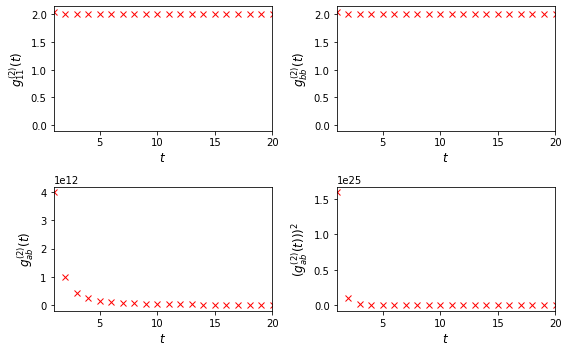

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))
background=1e-30
quantities_dict = {
  "g_aa": [r'$g_{11}^{(2)}(t)$', ((expected_vals_dict["ad_ad_a_a"])/(background**2+expected_vals_dict["na"]**2))], 
  "g_bb": [r'$g_{bb}^{(2)}(t)$', ((expected_vals_dict["bd_bd_b_b"])/(background**2+expected_vals_dict["nb"]**2))],
  "g_ab": [r'$g_{ab}^{(2)}(t)$', ((expected_vals_dict["ad_a_bd_b"])/(background**2+expected_vals_dict["na"]*expected_vals_dict["nb"]))],
  "g_ab_squared": [r'$(g_{ab}^{(2)}(t)))^{2}$', ((expected_vals_dict["ad_a_bd_b"])/(background**2+expected_vals_dict["na"]*expected_vals_dict["nb"]))**2]

}

for idx, (quantity_key, (ylabel, data)) in enumerate(quantities_dict.items()):
    line = axes[idx//2, idx%2].plot(tlist, data, 'rx', linewidth=2)
    axes[idx//2, idx%2].set_xlabel("$t$", fontsize=plot_fontsize)
    axes[idx//2, idx%2].set_xlim(1, 20) # 
    axes[idx//2, idx%2].set_ylabel(ylabel, fontsize=plot_fontsize)
#    axes[idx//2, idx%2].set_yscale("log")


fig.tight_layout()


## Sources and further reading


* [Review Article](https://doi.org/10.1080/00107514.2018.1488463)
* [HC Photonics PPLN GUIDE: Overview](https://www.hcphotonics.com/ppln-guide-overview)
* [quED Manual](https://www.qutools.com/files/quED/quED_manual.pdf)
* Saleh and Teich, *Fundamentals of Photonics*
* [Bocquillon et al, PRA 79 035801 (200p](http://dx.doi.org/10.1103/PhysRevA.79.035801
* [Razavi et al, JPhysB 42 114013 (2009)](http://stacks.iop.org/JPhysB/42/114013)
* [Thorn et al, Am Jo of Phys 72, 1210-1219 (2004)](https://aapt.scitation.org/doi/10.1119/1.1737397)
* quTools HBT manual: https://www.qutools.com/files/quED/quED-HBT/quED-HBT-manual.pdf
* quTools secret HBT manual: https://www.qutools.com/files/quED/worksheets/qutools_HBT.pdf
* [M. Beck, J. Opt. Soc. Am. B 24, 2972-2978 (2007)]https://opg.optica.org/josab/abstract.cfm?URI=josab-24-12-2972
* Loudon, *The Quantum Theory of Light*
* Fox, *Quantum Optics: An Introduction*
* Gerry and Knight, *Introductory Quantum Optics*

## Pre-Lab Questions

Before coming to the lab for the HBT experiment, please complete these pre-lab questions and be ready to *show your work*. If you have questions, ask the instructor before starting the lab.

1. What is $\gtwo(0)$ for a number state with 2 photons? What about with 3 photons? Generalize this to Fock state $\ket{n}$ with n photons and plot $\gtwo(0)$ as a function of n.
1. What is $\gtwo(0)$ for a coherent state $\ket{\alpha}$?
1. *Bonus:* What is $\gtwo(0)$ for a thermal state?